# Practical Exercise with MNIST Example

In [1]:
import torch
import torch.nn

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from model import ImageClassifier

from utils import load_mnist
from utils import split_data
from utils import get_hidden_sizes

In [3]:
model_fn = "./model.pth"

In [4]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [5]:
def load(fn, device):
    d = torch.load(fn, map_location=device)
    
    return d['model'], d['config']

In [6]:
def plot(x, y_hat):
    for i in range(x.size(0)):
        img = (np.array(x[i].detach().cpu(), dtype='float')).reshape(28,28)

        plt.imshow(img, cmap='gray')
        plt.show()
        print("Predict:", float(torch.argmax(y_hat[i], dim=-1)))

In [7]:
def test(model, x, y, to_be_shown=True):
    model.eval()
    
    with torch.no_grad():
        y_hat = model(x)

        correct_cnt = (y.squeeze() == torch.argmax(y_hat, dim=-1)).sum()
        total_cnt = float(x.size(0))
        
        accuracy = correct_cnt / total_cnt
        print("Accuracy: %.4f" % accuracy)
        
        if to_be_shown:
            plot(x, y_hat)

In [8]:
# Load MNIST test set.
x, y = load_mnist(is_train=False)
# Reshape tensor to chunk of 1-d vectors.
x = x.view(x.size(0), -1)

x, y = x.to(device), y.to(device)

input_size = int(x.shape[-1])
output_size = int(max(y)) + 1

model_dict, train_config = load(model_fn, device)

model = ImageClassifier(
    input_size=input_size,
    output_size=output_size,
    hidden_sizes=get_hidden_sizes(input_size,
                                  output_size,
                                  train_config.n_layers),
    use_batch_norm=not train_config.use_dropout,
    dropout_p=train_config.dropout_p,
).to(device)

model.load_state_dict(model_dict)

test(model, x, y, to_be_shown=False)

Accuracy: 0.9837


Accuracy: 1.0000


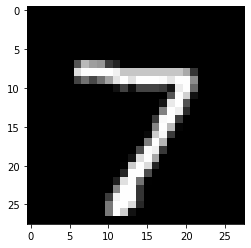

Predict: 7.0


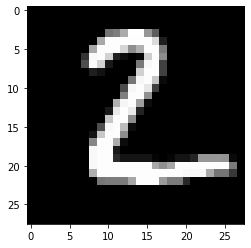

Predict: 2.0


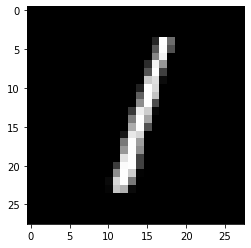

Predict: 1.0


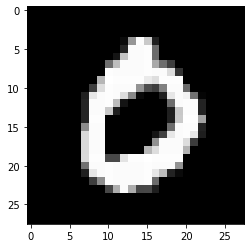

Predict: 0.0


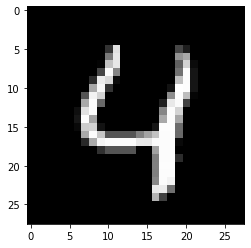

Predict: 4.0


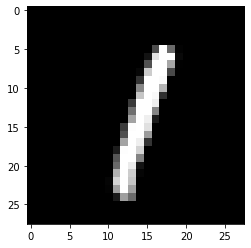

Predict: 1.0


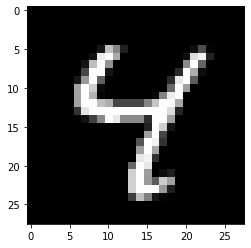

Predict: 4.0


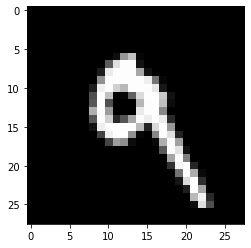

Predict: 9.0


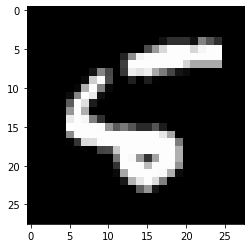

Predict: 5.0


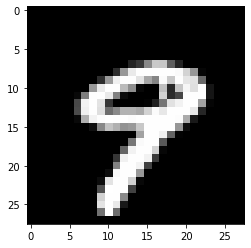

Predict: 9.0


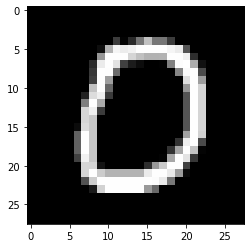

Predict: 0.0


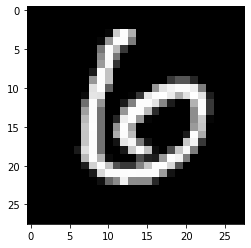

Predict: 6.0


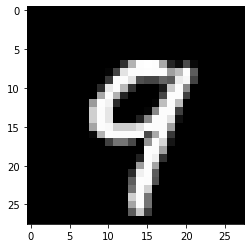

Predict: 9.0


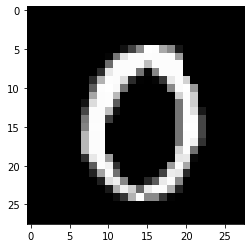

Predict: 0.0


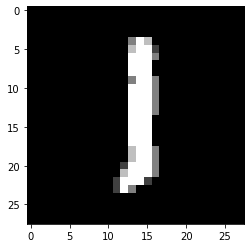

Predict: 1.0


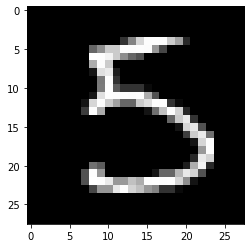

Predict: 5.0


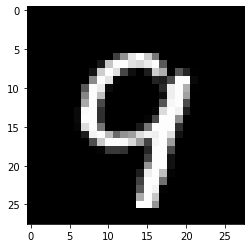

Predict: 9.0


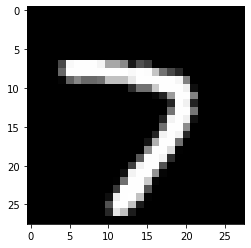

Predict: 7.0


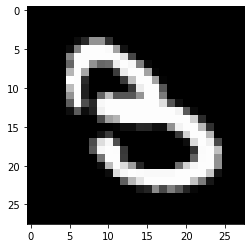

Predict: 3.0


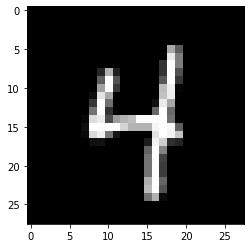

Predict: 4.0


In [9]:
n_test = 20
test(model, x[:n_test], y[:n_test], to_be_shown=True)